In [85]:
%%capture
%run testbed.ipynb
# Imports the code, supresses output

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Implementing KMeans

In [66]:
class KMeans2:
    def __init__(self, n_clusters: int, ) -> None:
        self.k = n_clusters
        self.cluster_centers_ = None

    # Gets index of closest mean to x
    def get_closest_mean(self, x):
            distance_from_x = lambda index: np.linalg.norm(x-self.cluster_centers_[index])
            return min(range(self.k), key=distance_from_x)
    
    def fit(self, X) -> None:
        # Set self.cluster_centers_ to a list of k means
        dim = X.shape[1]
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        for i in range(200):
            total_movement = 0
            
            # Assign points to clusters
            self.assignments = self.predict(X)

            # Update clusters
            for mean_index in range(self.k):
                indices = np.where(self.assignments == mean_index)
                points = X[indices]
                print(points.shape)
                new_m = np.mean(points, axis=0)
                total_movement += np.linalg.norm(new_m - self.cluster_centers_[mean_index])
                self.cluster_centers_[mean_index] = new_m
            
            # Early exit
            if total_movement < 0.1:
                print("Stopping after {i} iterations")
                break

    def predict(self, X) -> np.array:        
        return np.apply_along_axis(self.get_closest_mean, 1, X)

    def fit_predict(self, X) -> np.array:
        self.fit(X)
        return self.predict(X)




## Testing

In [73]:
# Constructs and runs a classifier test on 4 Gaussians in 6D
def test_classifier(clf, d=6, plot=True):
    dataset, means, labels = DataGenerators.gen_gaussians(n=1000, d=d, k=4)

    predictions = clf.fit_predict(dataset)
    # print("True means: ", means)
    # print("Predicted means: ", clf.cluster_centers_)

    if plot:
        # Plots labels, then predictions (with dimred)
        fig, (ax1, ax2) = plt.subplots(2)
        plt.figure(figsize=(8, 16))
        plt.sca(ax1)
        VizTools.plot_2d(dataset, labels=labels, title="Ground Truth")
        plt.sca(ax2)
        VizTools.plot_2d(dataset, labels=predictions, title="Predictions")
    
    return predictions

<Figure size 800x1600 with 0 Axes>

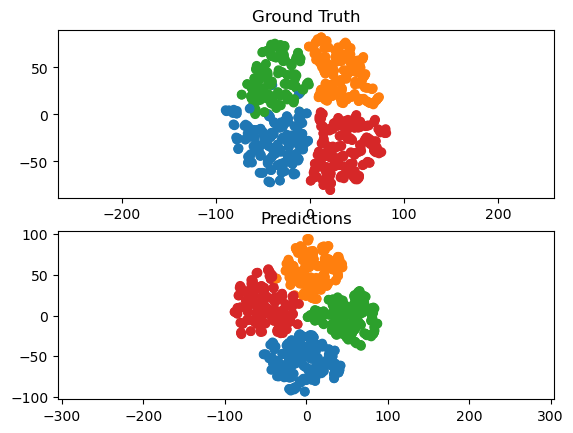

In [50]:
clf1 = KMeans(n_clusters=4)
p = test_classifier(clf1)

(199, 6)
(225, 6)
(266, 6)
(310, 6)
(254, 6)
(241, 6)
(253, 6)
(252, 6)
(257, 6)
(245, 6)
(249, 6)
(249, 6)
(257, 6)
(245, 6)
(249, 6)
(249, 6)
Stopping after {i} iterations


<Figure size 800x1600 with 0 Axes>

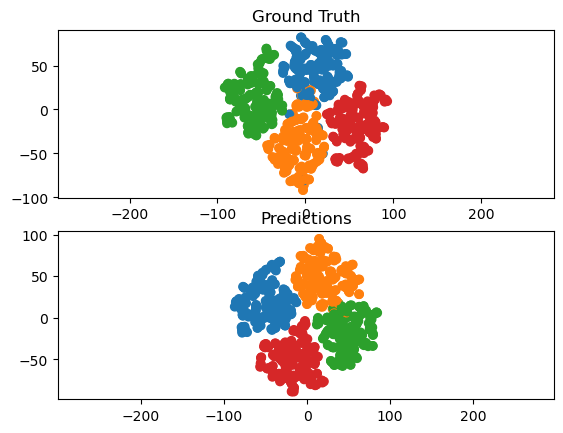

In [65]:
clf2 = KMeans2(n_clusters=4)
p2 = test_classifier(clf2)

Success!

## K Nearest Neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from dataclasses import dataclass
from statistics import mode

In [132]:
class SimpleKNN:

    @dataclass
    class NeighborData:
        distance: float = float("inf")
        index: int = 0


    def __init__(self, n_neighbors) -> None:
        self.k = n_neighbors

    def fit(self, X, y) -> None:
        # Can construct search data structure here (such as k-D tree)
        # For now brute force
        self.neighbors = X
        self.labels = y

    def predict(self, X) -> np.array:
        return np.apply_along_axis(lambda x: self.predict_single(x), 1, X)

    def predict_single(self, x) -> int:
        def update_neighbor_data(nd: self.NeighborData):
            farthest_ind = max(range(self.k), key=lambda i: nearest_neighbor_data[i].distance)
            if nearest_neighbor_data[farthest_ind].distance > nd.distance:
                nearest_neighbor_data[farthest_ind] = nd

        nearest_neighbor_data = [self.NeighborData()] * self.k # Pairs of (dist, index in self.neighbors)

        for i in range(self.neighbors.shape[0]):
            nd = self.NeighborData(
                distance=np.linalg.norm(x - self.neighbors[i]),
                index=i,
            )
            update_neighbor_data(nd)
        
        indices = [nd.index for nd in nearest_neighbor_data]
        labels = self.labels[indices]
        print(labels)
        print(mode(labels))
        return mode(labels)

    

[3 3 3 3 3]
3
[2 2 2 2 2]
2
[0 0 0 0 0]
0
[0 0 0 0 0]
0
[2 2 2 2 2]
2
[2 1 1 2 1]
1
[1 1 1 2 1]
1
[0 0 0 0 0]
0
[0 0 0 0 0]
0
[3 3 3 3 3]
3
[1 1 1 2 1]
1
[0 0 0 0 0]
0
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[1 1 1 1 1]
1
[0 0 0 0 0]
0
[1 1 1 1 1]
1
[2 2 2 2 2]
2
[1 2 1 1 2]
1
[1 1 2 1 1]
1
[0 0 0 0 0]
0
[3 3 3 3 3]
3
[0 0 0 0 0]
0
[1 1 1 1 1]
1
[1 1 1 1 1]
1
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[0 0 0 0 0]
0
[0 0 0 0 0]
0
[2 2 2 2 2]
2
[0 0 0 0 0]
0
[3 3 3 3 3]
3
[1 1 2 2 1]
1
[2 2 2 2 2]
2
[1 1 1 2 2]
1
[3 3 3 3 3]
3
[2 2 2 2 2]
2
[1 1 1 1 2]
1
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[1 1 1 1 1]
1
[0 0 0 0 0]
0
[0 0 0 0 0]
0
[0 0 0 0 0]
0
[2 2 2 2 2]
2
[0 0 0 0 0]
0
[3 3 3 3 3]
3
[0 0 0 0 0]
0
[3 3 3 3 3]
3
[1 1 1 1 1]
1
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[0 0 0 0 0]
0
[2 2 2 2 2]
2
[1 1 1 1 2]
1
[3 3 3 3 3]
3
[3 3 3 3 3]
3
[0 0 0 0 0]
0
[1 1 1 2 1]
1
[2 2 2 2 2]
2
[0 0 0 0 0]
0
[1 1 1 1 1]
1
[0 0 0 0 0]
0
[2 1 1 1 1]
1
[3 3 3 3 3]
3
[2 2 2 2 2]
2
[1 1 1 1 1]
1
[0 0 0 0 0]
0
[2 2 2

array([3, 2, 0, 0, 2, 1, 1, 0, 0, 3, 1, 0, 3, 3, 3, 1, 0, 1, 2, 1, 1, 0,
       3, 0, 1, 1, 3, 3, 3, 0, 0, 2, 0, 3, 1, 2, 1, 3, 2, 1, 3, 3, 3, 1,
       0, 0, 0, 2, 0, 3, 0, 3, 1, 3, 3, 0, 2, 1, 3, 3, 0, 1, 2, 0, 1, 0,
       1, 3, 2, 1, 0, 2, 0, 3, 3, 0, 0, 2, 1, 0, 2, 3, 1, 1, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 2, 2, 3, 1, 2, 0, 2,
       0, 1, 2, 2, 3, 0, 0, 2, 2, 3, 1, 0, 1, 2, 2, 3, 0, 2, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 3, 1, 0, 1, 1, 0, 0, 2, 3, 0, 2, 1, 2, 2, 0, 1,
       0, 2, 1, 3, 3, 2, 3, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 3, 2, 2, 2, 0,
       3, 0, 3, 1, 1, 3, 2, 2, 3, 3, 3, 1, 3, 2, 0, 3, 0, 1, 1, 3, 1, 0,
       3, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 3, 0, 0, 1,
       0, 2, 1, 3, 1, 3, 1, 3, 1, 1, 1, 2, 3, 0, 0, 0, 1, 0, 2, 0, 2, 2,
       2, 3, 3, 0, 3, 2, 2, 0, 2, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 3, 1, 1, 3, 3, 0, 3, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 0,
       2, 0, 0, 0, 2, 1, 2, 0, 3, 3, 0, 0, 2, 0, 0,

<Figure size 800x1600 with 0 Axes>

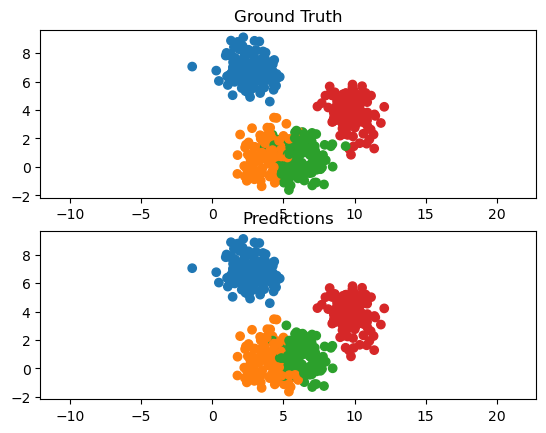

In [137]:
test_supervised(SimpleKNN(5), d=2)

In [ ]:
"""
Maintain a list of k neraest neighbors found so far for each query sample x
Iterate through neighbors, and update those lists
"""
class ChunkerKNN:
    # todo copy from SimpleKNN and adapt
    pass


In [87]:
# Constructs and runs a classifier test on 4 Gaussians in 6D
def test_supervised(clf, d=6, plot=True):
    # train_data, train_means, train_labels = DataGenerators.gen_gaussians(n=1000, d=d, k=4)
    # test_data, test_means, test_labels = DataGenerators.gen_gaussians(n=1000, d=d, k=4)

    data, means, labels = DataGenerators.gen_gaussians(n=1000, d=d, k=4)
    train_data, test_data = np.array_split(data, 2)
    train_labels, test_labels = np.array_split(labels, 2)

    clf.fit(X=train_data, y=train_labels)
    predictions = clf.predict(test_data)

    if plot:
        # Plots labels, then predictions (with dimred)
        fig, (ax1, ax2) = plt.subplots(2)
        plt.figure(figsize=(8, 16))
        plt.sca(ax1)
        VizTools.plot_2d(test_data, labels=test_labels, title="Ground Truth")
        plt.sca(ax2)
        VizTools.plot_2d(test_data, labels=predictions, title="Predictions")
    
    return predictions

array([2, 0, 3, 3, 3, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 3, 3, 0, 3, 3, 0,
       3, 1, 0, 0, 3, 0, 1, 2, 2, 1, 0, 3, 1, 1, 1, 3, 1, 1, 2, 0, 3, 3,
       3, 1, 0, 2, 2, 1, 3, 0, 2, 3, 1, 3, 0, 0, 2, 3, 3, 0, 1, 1, 2, 3,
       3, 2, 0, 1, 2, 2, 2, 0, 0, 3, 0, 0, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0,
       0, 3, 2, 1, 0, 3, 1, 3, 0, 2, 0, 0, 1, 1, 0, 0, 2, 3, 1, 2, 2, 3,
       3, 3, 0, 0, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 3, 3, 1, 2, 2, 0, 0,
       0, 0, 1, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1, 0, 3, 2, 0, 2, 0, 3, 3, 3,
       2, 3, 2, 2, 1, 0, 0, 1, 0, 3, 0, 2, 3, 1, 2, 0, 1, 1, 1, 3, 3, 0,
       1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 3, 0, 0, 2, 0, 0, 2, 0,
       3, 3, 3, 3, 1, 0, 1, 1, 0, 0, 0, 3, 1, 1, 2, 1, 1, 3, 0, 0, 0, 2,
       0, 0, 0, 3, 3, 0, 0, 3, 2, 1, 3, 0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 2,
       0, 0, 3, 1, 1, 2, 2, 0, 2, 3, 3, 0, 1, 3, 1, 2, 3, 3, 1, 0, 3, 0,
       0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 3, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 1, 3, 2, 3, 1, 3, 1, 0, 3, 3, 1, 3, 3,

<Figure size 800x1600 with 0 Axes>

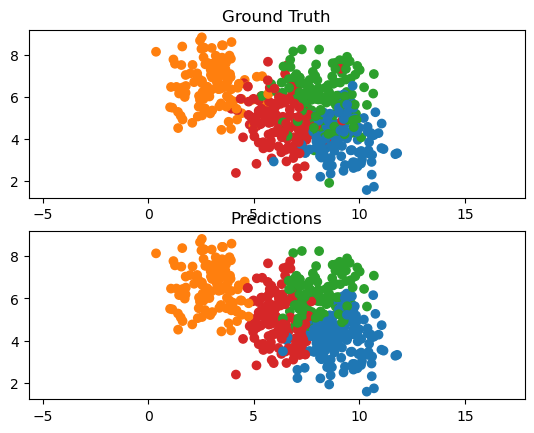

In [88]:
test_supervised(KNeighborsClassifier(4), d=2)

In [ ]:
# test_supervised(KNeighborsClassifier(4), d=6)


In [92]:
test_supervised(SimpleKNN(4), d=2)

NameError: name 'SimpleKNN' is not defined

[1 1 1 1]
1
[1 1 1 1]
1
[0 0 0 0]
0
[0 0 0 0]
0
[2 2 2 2]
2
[2 2 2 2]
2
[2 2 2 2]
2
[0 0 0 0]
0
[3 3 3 3]
3
[3 3 3 3]
3
[3 3 3 3]
3
[1 1 1 1]
1
[1 1 1 1]
1
[1 1 1 1]
1
[1 1 1 1]
1
[3 3 3 3]
3
[0 0 0 0]
0
[3 2 2 3]
3
[3 3 3 3]
3
[1 1 1 1]
1
[1 1 1 1]
1
[0 0 0 0]
0
[0 0 0 0]
0
[1 1 1 1]
1
[2 2 2 2]
2
[1 1 1 1]
1
[2 2 2 2]
2
[3 3 3 3]
3
[0 0 0 0]
0
[0 0 0 0]
0
[0 0 0 0]
0
[2 2 2 2]
2
[1 1 1 1]
1
[2 2 2 2]
2
[2 3 2 2]
2
[2 2 2 2]
2
[1 1 1 1]
1
[3 3 3 3]
3
[2 2 2 2]
2
[2 3 3 3]
3
[2 2 2 2]
2
[3 3 3 3]
3
[0 0 0 0]
0
[2 3 3 3]
3
[2 3 2 2]
2
[2 2 2 2]
2
[3 3 3 3]
3
[3 3 3 3]
3
[3 3 3 3]
3
[0 0 0 0]
0
[0 0 0 0]
0
[0 0 0 0]
0
[0 0 0 0]
0
[0 0 0 0]
0
[2 2 0 2]
2
[0 0 0 0]
0
[1 1 1 1]
1
[3 3 3 3]
3
[3 3 3 3]
3
[0 0 0 0]
0
[2 2 2 2]
2
[0 0 0 0]
0
[2 2 2 2]
2
[3 3 3 3]
3
[2 2 2 2]
2
[3 3 3 3]
3
[3 3 3 3]
3
[2 2 2 2]
2
[0 0 0 0]
0
[2 3 3 2]
2
[2 2 2 2]
2
[2 2 2 2]
2
[1 1 1 1]
1
[3 3 3 3]
3
[0 0 0 0]
0
[0 0 0 0]
0
[1 1 1 1]
1
[3 3 3 3]
3
[0 0 0 0]
0
[3 3 3 3]
3
[2 2 2 2]
2
[0 0 0 0]
0
[1 1 1 1]
1
[2 2

array([1, 1, 0, 0, 2, 2, 2, 0, 3, 3, 3, 1, 1, 1, 1, 3, 0, 3, 3, 1, 1, 0,
       0, 1, 2, 1, 2, 3, 0, 0, 0, 2, 1, 2, 2, 2, 1, 3, 2, 3, 2, 3, 0, 3,
       2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 1, 3, 3, 0, 2, 0, 2, 3, 2, 3,
       3, 2, 0, 2, 2, 2, 1, 3, 0, 0, 1, 3, 0, 3, 2, 0, 1, 2, 3, 2, 0, 0,
       2, 3, 3, 0, 0, 2, 2, 2, 2, 0, 2, 1, 3, 0, 1, 3, 2, 3, 3, 1, 3, 0,
       3, 0, 2, 3, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 3, 1, 1, 3, 2, 2,
       2, 3, 0, 3, 3, 2, 0, 1, 0, 0, 2, 3, 3, 3, 3, 3, 1, 0, 0, 3, 3, 0,
       3, 1, 1, 3, 1, 2, 3, 1, 0, 2, 0, 3, 0, 3, 1, 2, 0, 2, 2, 1, 2, 1,
       2, 2, 0, 0, 1, 2, 3, 0, 1, 3, 3, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 3, 3, 0, 2, 1, 1, 3, 0, 2, 0, 3, 0, 1, 3, 3, 2, 0, 1, 3, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 2, 3, 3, 1, 0, 2, 3, 1, 3, 2, 0, 2, 0, 3,
       3, 2, 2, 0, 2, 1, 0, 3, 2, 3, 2, 3, 2, 1, 0, 3, 3, 1, 2, 1, 1, 0,
       2, 0, 3, 2, 1, 3, 1, 3, 3, 2, 3, 1, 0, 3, 2, 2, 1, 3, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 1, 2, 3, 1, 3, 2, 0, 2, 2, 1,

<Figure size 800x1600 with 0 Axes>

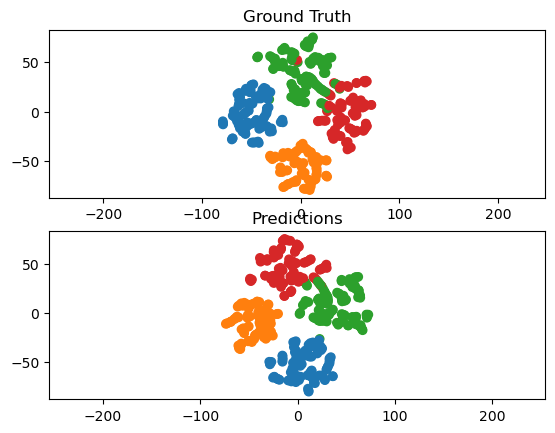

In [138]:
test_supervised(SimpleKNN(4), d=6)